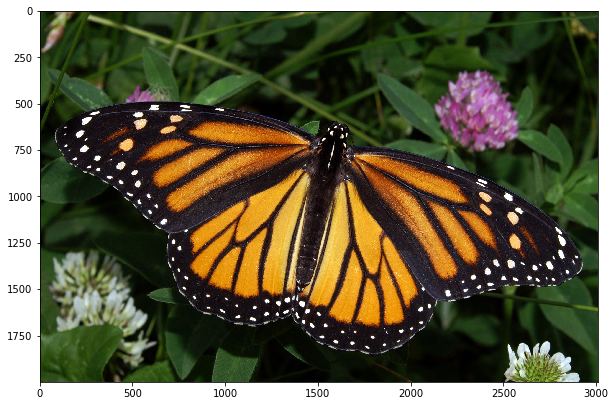

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

%matplotlib inline

image = cv2.imread('images/monarch.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(image)

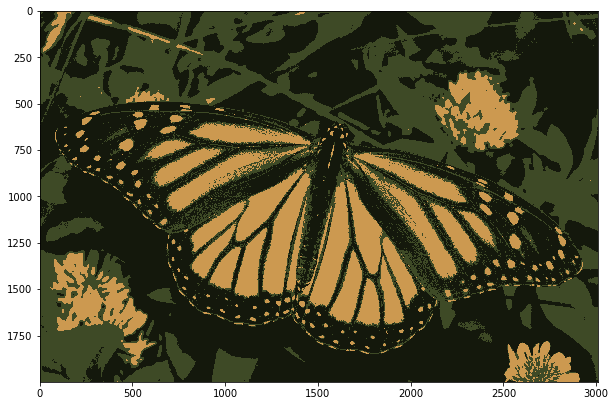

In [2]:
pixel_vals = image.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

#define the criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
ret,label,center = cv2.kmeans(pixel_vals,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
segmented_data = center[label.flatten()]

segmented_data = segmented_data.reshape((image.shape))
label_reshape = label.reshape(image.shape[0], image.shape[1])

plt.figure(figsize=(10,8))
plt.imshow(segmented_data)

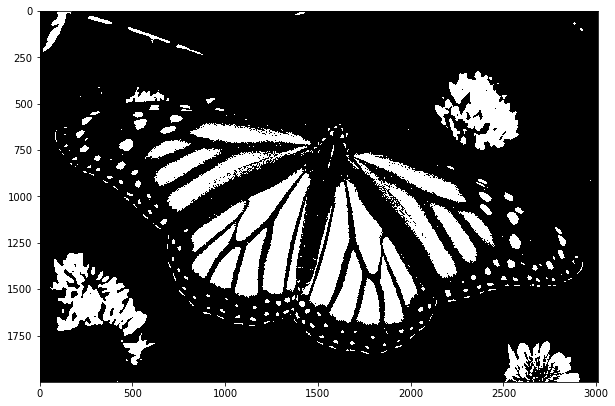

In [3]:
plt.figure(figsize=(10,8))
plt.imshow(label_reshape==0, cmap='gray')

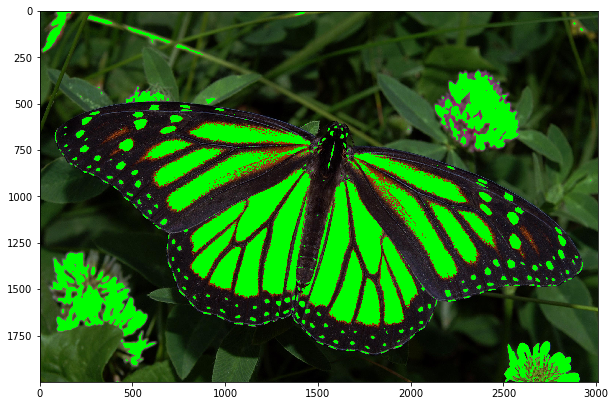

In [4]:
cluster = 0 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
masked_image[label_reshape == cluster] = [0, 255, 0]

plt.figure(figsize=(10,8))
plt.imshow(masked_image)